In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
Data = pd.read_csv('Data/water_potability.csv')
Data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
Data = Data.rename(columns={'Hardness'        :  'Dureza',
                     'Solids'          :  'Sólidos',
                     'Chloramines'     :  'Cloraminas',
                     'Sulfate'         :  'Sulfato',
                     'Conductivity'    :  'Condutividade',
                     'Organic_carbon'  :  'Carbono organico',
                     'Trihalomethanes' :  'Trialometanos',
                     'Turbidity'       :  'Turbidez',
                     'Potability'      :  'Potabilidade'})

Data

ph      Dureza       Sólidos  Cloraminas     Sulfato  \
0          NaN  204.890455  20791.318981    7.300212  368.516441   
1     3.716080  129.422921  18630.057858    6.635246         NaN   
2     8.099124  224.236259  19909.541732    9.275884         NaN   
3     8.316766  214.373394  22018.417441    8.059332  356.886136   
4     9.092223  181.101509  17978.986339    6.546600  310.135738   
...        ...         ...           ...         ...         ...   
3271  4.668102  193.681735  47580.991603    7.166639  359.948574   
3272  7.808856  193.553212  17329.802160    8.061362         NaN   
3273  9.419510  175.762646  33155.578218    7.350233         NaN   
3274  5.126763  230.603758  11983.869376    6.303357         NaN   
3275  7.874671  195.102299  17404.177061    7.509306         NaN   

      Condutividade  Carbono organico  Trialometanos  Turbidez  Potabilidade  
0        564.308654         10.379783      86.990970  2.963135             0  
1        592.885359         15.180013      56.329076  4.500656             0  
2        418.606213         16.868637      66.420093  3.055934             0  
3        363.266516         18.436524     100.341674  4.628771             0  
4        398.410813         11.558279      31.997993  4.075075             0  
...             ...               ...            ...       ...           ...  
3271     526.424171         13.894419      66.687695  4.435821             1  
3272     392.449580         19.903225            NaN  2.798243             1  
3273     432.044783         11.039070      69.845400  3.298875             1  
3274     402.883113         11.168946      77.488213  4.708658             1  
3275     327.459760         16.140368      78.698446  2.309149             1  

[3276 rows x 10 columns]

In [4]:
Data.Potabilidade.value_counts()

0    1998
1    1278
Name: Potabilidade, dtype: int64

In [5]:
Data.isnull().sum()

ph                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

In [6]:
(Data.isnull().sum()/len(Data))*100

#porcentagem de NaN

ph                  14.987790
Dureza               0.000000
Sólidos              0.000000
Cloraminas           0.000000
Sulfato             23.840049
Condutividade        0.000000
Carbono organico     0.000000
Trialometanos        4.945055
Turbidez             0.000000
Potabilidade         0.000000
dtype: float64

In [17]:
df = Data.dropna(axis = 0)

In [19]:
df.Potabilidade.value_counts(normalize=True)*100

0    59.671805
1    40.328195
Name: Potabilidade, dtype: float64

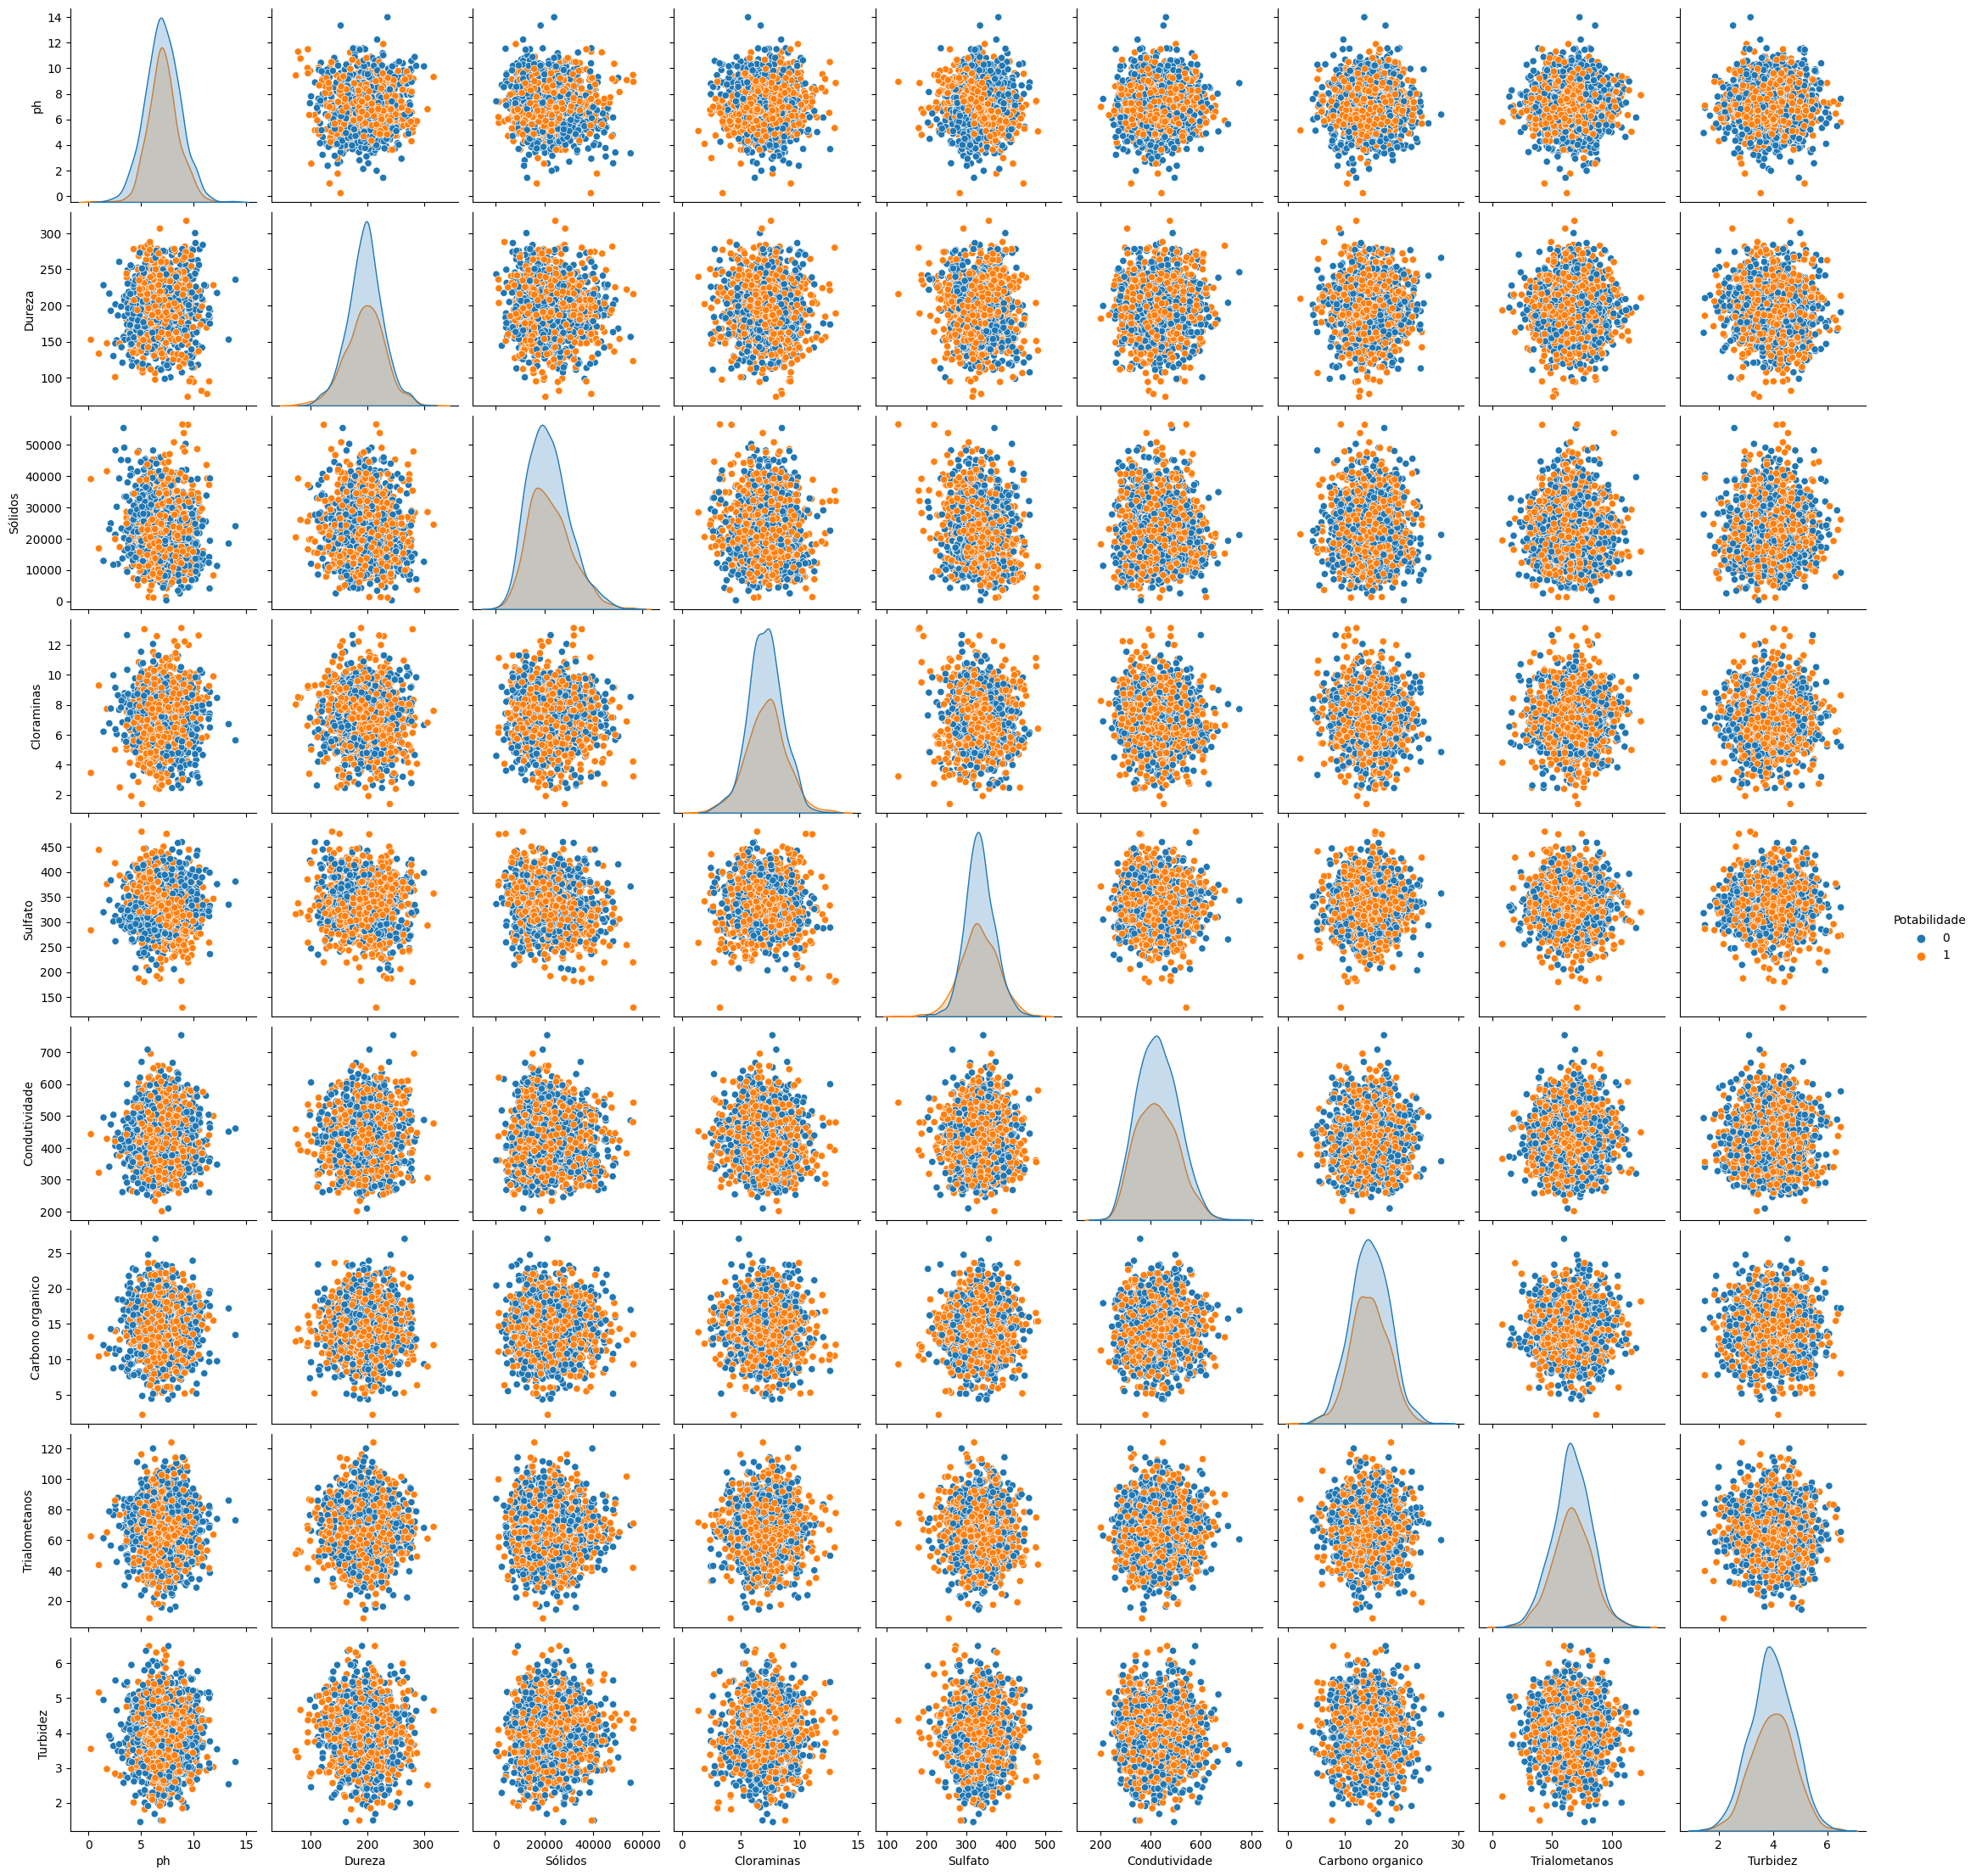

In [21]:
sns.pairplot(df, hue ='Potabilidade')

<AxesSubplot:>

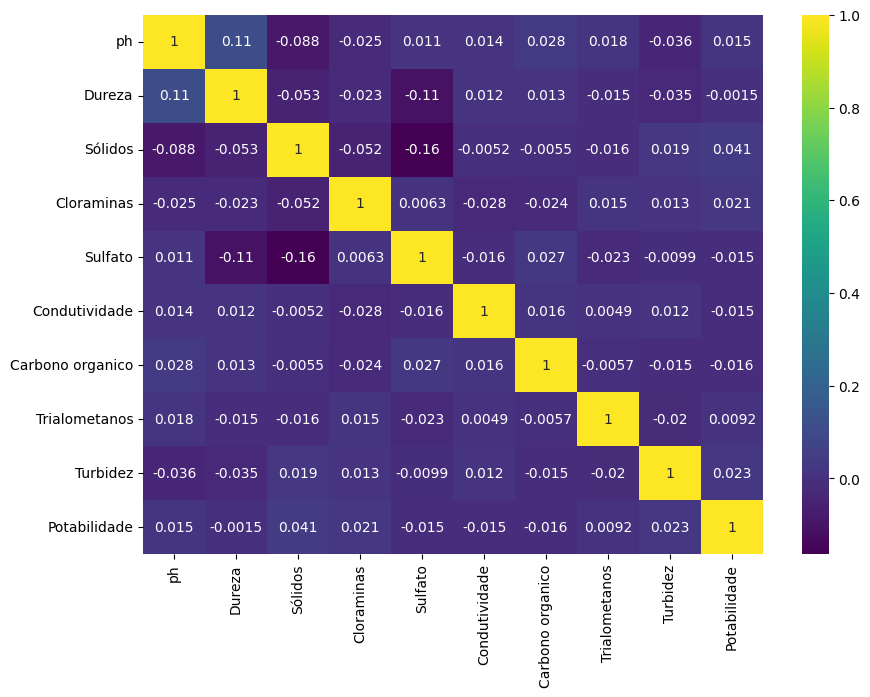

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### KNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# matriz de variáveis explicativas
X = df.drop('Potabilidade', axis = 1)

# variável target
y = df.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X



ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
3     0.782466  0.564114  0.011687    0.583804  0.574378      -0.783962   
4     1.275463 -0.455653 -0.455835   -0.370947 -0.560480      -0.348429   
5    -0.954835 -0.234614  0.790645    0.259104 -0.158911      -1.810063   
6     1.994902  1.596951  0.790764    0.239248  1.467140      -1.770608   
7     0.985323  0.226606 -0.954313   -1.622878 -0.726179       0.595858   
...        ...       ...       ...         ...       ...            ...   
3267  1.210411  0.584770 -0.693978   -0.528284 -0.492625      -0.447578   
3268 -0.243774  0.347964 -0.540564    0.362137 -0.697038      -1.205321   
3269  2.800492 -3.100365  1.767503    1.343596 -1.803476       0.165656   
3270 -0.646160 -0.285317  0.488576    0.387023  0.302843      -0.131852   
3271 -1.537172 -0.070075  2.970287    0.020386  0.648718       1.238006   

      Carbono organico  Trialometanos  Turbidez  
3             1.227032       2.111652  0.844761  
4            -0.842154      -2.140399  0.135033  
5            -1.792340      -0.714423 -1.807366  
6            -0.170876       1.132494 -1.662163  
7            -0.599824      -0.224135  0.553348  
...                ...            ...       ...  
3267         -1.341281      -0.705001  0.825626  
3268          0.559422      -2.334474 -0.675183  
3269          0.546021      -1.545585  0.512125  
3270         -0.688929      -0.372108 -0.384562  
3271         -0.139372       0.017846  0.597437  

[2011 rows x 9 columns]

In [24]:
# separa em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste')

Há 1347 dados de treino e 664 dados de teste


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# instanciamos o modelo especificando o valor desejado de k com o argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors = 45)

In [75]:
# ajustamos o modelo aos dados de treinamento
knn.fit(X_train, y_train);

In [76]:
y_pred = knn.predict(X_test)

In [77]:
# montamos uma tabela com as previsões, indicando se estavam corretas ou não
Data_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index = y_test.index), 
                     y_test == y_pred], 
                    axis = 1
                   )

Data_pred.columns = ['ph', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade',
                   'Carbono organico', 'Trialometanos', 'Turbidez', 'Potabilidade', 
                   'y_pred', 'pred_ok']
Data_pred

ph    Dureza   Sólidos  Cloraminas   Sulfato  Condutividade  \
2144  0.681224  1.237515  0.696031   -0.587382 -0.191789       1.054141   
854   0.769483  0.068317 -0.514861    0.712287  0.882780      -1.638334   
637  -0.323689 -1.218204 -1.058478    1.657105  0.206936      -0.093614   
2299  0.330639  1.596023 -0.845762   -0.490893 -0.263821      -1.873895   
706  -1.076098 -0.717744  0.715455   -0.848680  0.956362       0.979223   
...        ...       ...       ...         ...       ...            ...   
2043  0.026748 -0.139984  0.383110   -0.332293 -0.339212      -0.089493   
1909 -0.089718  0.076880 -0.580230   -0.500454 -0.818135       0.546189   
847   1.210676 -0.004875  0.209587    0.236027  0.376016       1.549264   
835   0.225586 -0.386348 -0.539067   -1.593065  0.058303       0.328022   
137   0.663466 -0.553809  0.684805    1.181292  0.029466      -0.365647   

      Carbono organico  Trialometanos  Turbidez  Potabilidade  y_pred  pred_ok  
2144         -0.293651       0.888820  0.640518             0       0     True  
854           1.103563      -1.389851  1.834363             0       0     True  
637          -1.195938       0.740636 -0.254329             0       0     True  
2299         -0.797686       1.765332  0.784140             0       0     True  
706           0.954533       0.054315  0.851278             1       0    False  
...                ...            ...       ...           ...     ...      ...  
2043         -0.448942       0.750796  0.693283             1       0    False  
1909          0.207004      -0.326929  0.347889             1       0    False  
847           0.269749       0.591485  0.672709             0       0     True  
835          -1.400908       0.879494 -1.888588             0       0     True  
137           0.474877       0.932607 -0.778299             0       0     True  

[664 rows x 12 columns]

In [78]:
# obtemos a matriz de confusão
from sklearn.metrics import confusion_matrix
MCKNN = confusion_matrix(y_test, y_pred)
MCKNN

array([[370,  29],
       [206,  59]], dtype=int64)

In [79]:
# a coluna 'pred_ok' indica com variáveis booleanos se a previsão estava correta
# a média desta série indica a proporção de classificação correta 
Data_pred['pred_ok'].mean()

0.6460843373493976

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6460843373493976

<AxesSubplot:>

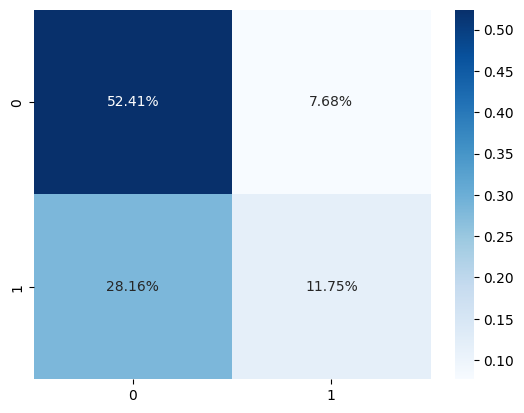

In [33]:
KNN_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.87      0.75       399
           1       0.60      0.29      0.40       265

    accuracy                           0.64       664
   macro avg       0.63      0.58      0.57       664
weighted avg       0.63      0.64      0.61       664



#### Regressão Logistica

In [85]:
# matriz de features
X = df.drop(columns = ['Potabilidade'])

# variável target
y = df['Potabilidade']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [87]:
# Padronizamos os dados para que a regularização seja correta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
accuracy_score(y_train, lr.predict(X_train_std))

0.5994694960212201

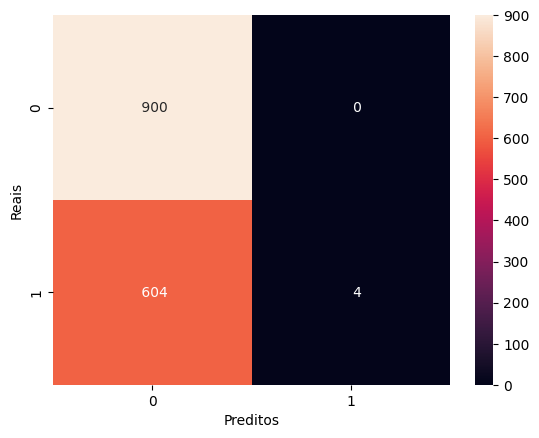

In [91]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

In [92]:
lr.predict_proba(X_train_std[y_train == 0])[ : , 1]

array([0.40367732, 0.37640351, 0.44169321, 0.438705  , 0.41930322,
       0.37765936, 0.38952968, 0.36755467, 0.39122742, 0.38749298,
       0.41307669, 0.42010872, 0.41186117, 0.44005577, 0.41610259,
       0.40100407, 0.38298858, 0.39816762, 0.37280187, 0.39374915,
       0.38567512, 0.43591133, 0.38588469, 0.39506393, 0.40506497,
       0.36212066, 0.37945075, 0.41018376, 0.41630383, 0.4013632 ,
       0.45109028, 0.39045049, 0.38504746, 0.4140989 , 0.37985147,
       0.39745904, 0.44212085, 0.39734193, 0.36555057, 0.36056593,
       0.37319366, 0.40920043, 0.36864396, 0.44750819, 0.39085878,
       0.34535048, 0.39475292, 0.39999423, 0.42215348, 0.40452223,
       0.40282855, 0.40888344, 0.41394463, 0.36403281, 0.39401201,
       0.40518741, 0.37093436, 0.38315768, 0.3898218 , 0.39703219,
       0.3918173 , 0.39924795, 0.41769969, 0.36064692, 0.39492568,
       0.39734215, 0.41025857, 0.39777094, 0.43947631, 0.38946208,
       0.38981205, 0.34166981, 0.38475007, 0.39477094, 0.39412

In [93]:
# verificamos que as proporções da variável target no treino e teste são correspondentes
y_train.mean(), y_test.mean()

(0.40318302387267907, 0.40357852882703776)

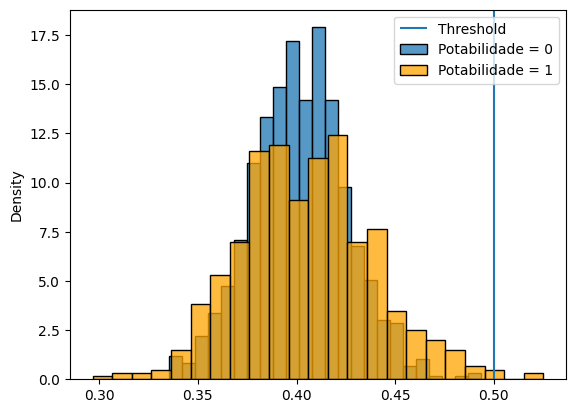

In [94]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train == 0])[ : , 1], 
             stat = 'density'
            )

sns.histplot(data = lr.predict_proba(X_train_std[y_train == 1])[ : , 1], 
             stat = 'density', 
             color = 'orange'
            )
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Threshold', 'Potabilidade = 0', 'Potabilidade = 1']);

In [135]:
threshold = 0.44
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > threshold

In [136]:
accuracy_score(y_train, y_pred_train)

0.6206896551724138